In [1]:
company_output = 'PETR4.SA'
end_date = '2024-11-15' 
start_date = '2024-06-01'
stock_var = 'Adj Close'
company_inputs = 'PETR4.SA'

seq_length = 20
batch_size = 10
h = 1

In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [3]:
import mlflow
import mlflow.sklearn

scaler_path = '../src/artifacts/transformers/scaler'
model_path = '../src/artifacts/models_tf/best_models'

scaler = mlflow.sklearn.load_model(scaler_path)
model = mlflow.sklearn.load_model(model_path)

In [4]:
from src.feature_engineering import get_finance_df, get_xx_dropna

df = get_finance_df(company_inputs, start_date, end_date, stock_var)

if (len(df) <= seq_length+h+1):
    raise Exception("Your dataset 'df' has less samples than the defined window size for data transformation, given by 'seq_length'")

X, y = get_xx_dropna(df, company_inputs)

[*********************100%***********************]  1 of 1 completed


In [5]:
from src.model_functions import make_predictions

y_pred = make_predictions(X, y, seq_length, batch_size, scaler, model)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


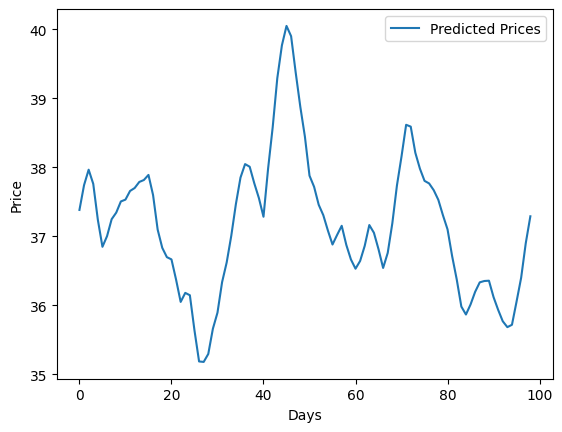

In [6]:
import matplotlib.pyplot as plt

# Plot the predicted prices\n"
plt.plot(y_pred, label="Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()